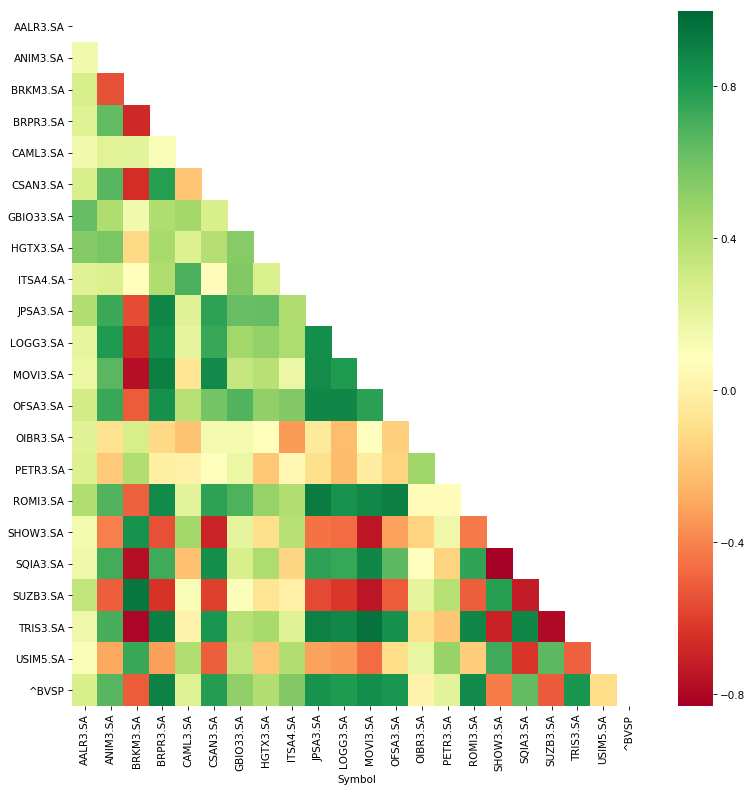

In [2]:
import numpy as np
import pandas as pd
#used to grab the stock prices, with YAHOO api
import pandas_datareader as web
from datetime import datetime
#to visualize the results
import matplotlib.pyplot as plt
import seaborn

#select start date for correlation window as well as list of tickers
start = datetime(2019, 1, 1)

symbols_list = ['^BVSP', 'AALR3.SA', 'ANIM3.SA', 'BRKM3.SA', 'BRPR3.SA', 'CAML3.SA', 'CSAN3.SA', 'GBIO33.SA', 'HGTX3.SA', 'ITSA4.SA',
                 'JPSA3.SA', 'LOGG3.SA', 'MOVI3.SA', 'OFSA3.SA', 'OIBR3.SA', 'PETR3.SA', 'ROMI3.SA', 'SHOW3.SA', 'SQIA3.SA', 
                 'SUZB3.SA', 'TRIS3.SA', 'USIM5.SA']


#array to store prices
symbols=[]
 
"X"

"""pull price using iex for each symbol in list defined above"""
for ticker in symbols_list: 
    r = web.DataReader(ticker, "yahoo", start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

"""concatenate into df"""

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]

df_pivot = df.pivot('Date','Symbol','Close').reset_index()


corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
del corr_df.index.name

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


#generate plot
my_dpi=75
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
seaborn.heatmap(corr_df, cmap='RdYlGn', mask = mask, fmt='.1g')
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('my_fig.png', dpi=my_dpi)
  